torch.Size([1, 480, 479])
输入形状 torch.Size([1, 1, 480, 479])
输出形状 torch.Size([1, 1, 478, 477])


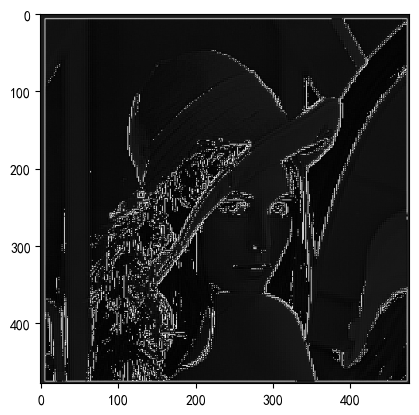

In [111]:
#################学习卷积
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch as t
#预处理模块
from PIL import Image
image=Image.open("./images/2023_6_30.jpg")
# plt.imshow(image)
# plt.show()
"""
这是一个用于边缘检测的卷积核。在这个卷积核中，中心元素是1，
表示当前位置的像素值对边缘检测有贡献，而周围的元素都是-0.1111，
表示对边缘检测没有贡献。这样的卷积核可以帮助我们提取图像中的垂直边缘特征。
"""
kernel=t.Tensor(
        [[-0.1111, -0.1111, -0.1111],
        [-0.1111,  1.0000, -0.1111],
        [-0.1111, -0.1111, -0.1111]],
)
kernel=t.ones(3,3)/-9
kernel[1][1]=1
#转换成灰度图
image=image.convert("L")
#转换成张量
imageTensor=transforms.ToTensor()(image)
print(imageTensor.shape)
#在第0个维度添加一个一维表示批次数据
input=imageTensor.unsqueeze(0)
print("输入形状",input.shape)
layer=nn.Conv2d(1,1,(3,3),bias=False)
# 定义输入张量shape为(batch_size, channels, height, width)
layer.weight.data=kernel.view(1,1,3,3)
output=layer(input)
plt.imshow(transforms.ToPILImage()(output.squeeze(0)),cmap="gray")
plt.show()
#每个卷积核（3×3）与原始的输入图像（480×479）进行卷积，这样得到的 feature map（特征图）大小为（480-3+1）×（479-3+1）= 478×477
print("输出形状",output.shape)

torch.Size([1, 1, 239, 238])
torch.Size([1, 1, 239, 238])


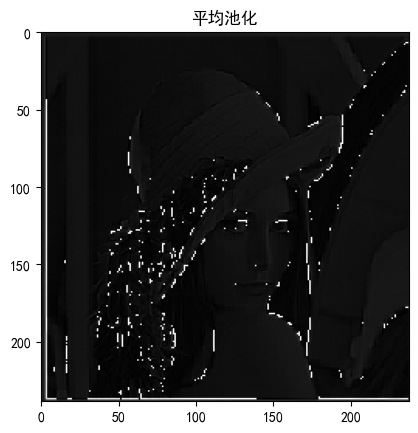

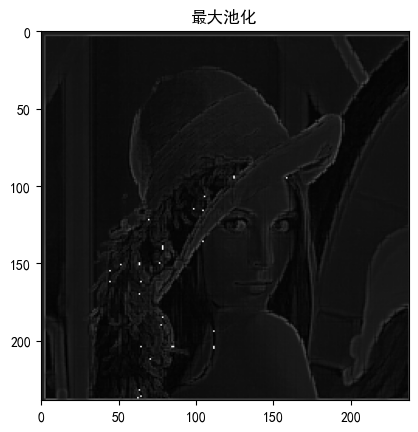

In [112]:
#################学习池化
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置全局字体为SimHei
#平均池化（AvgPool）
pool=nn.AvgPool2d(kernel_size=2, stride=2)
#池化层478×477经过(2,2)池化后=(478/2=239,477/2=238)
poolOuput=pool(output)
print(poolOuput.shape)
plt.title("平均池化")
plt.imshow(transforms.ToPILImage()(poolOuput.squeeze(0)),cmap="gray")
plt.show()
#最大化池
pool=nn.MaxPool2d(kernel_size=2, stride=2)
#池化层478×477经过(2,2)池化后=(478/2=239,477/2=238)
poolOuput=pool(output)
print(poolOuput.shape)
plt.title("最大池化")
plt.imshow(transforms.ToPILImage()(poolOuput.squeeze(0)),cmap="gray")
plt.show()

In [113]:
#################学习全连接
#注意全连接是特征连接是是改变最后一维的特征数的，在pytorch图片批量处理后最后需要进行view操作来降低维度。
arr=t.randn((3,4)) 
print(arr)
result=nn.Linear(4,5)
#全连接就是一个输入数据点乘(输入数据维度,输出数据维度)最后得到一个（输入数据行数，输出数据维度）的数组
print(result(arr))

tensor([[-0.1537,  0.9861,  0.0340, -1.5576],
        [-1.0829,  1.3889, -0.1158, -0.7069],
        [ 0.6919,  1.7733,  0.1173, -0.2133]])
tensor([[ 0.5686,  0.3369,  0.7121, -0.3772,  0.8509],
        [ 0.0604,  0.1518,  0.5291,  0.1612,  0.2553],
        [-0.1922,  0.3361,  0.5079, -0.5857,  0.9386]],
       grad_fn=<AddmmBackward>)


In [114]:
#################归一BatchNorm2d
"""
具体来说，nn.BatchNorm2d是应用在卷积层之后、激活函数之前的操作，其目的是对每个特征通道的数据进行归一化。
它通过对每个特征通道的数据进行标准化，使得数据的均值为0，方差为1。这样做的好处是可以防止梯度消失或爆炸的问题，
并且有助于加速模型的收敛速度。
除此之外，nn.BatchNorm2d还具有正则化的效果，可以减少模型的过拟合。它通过引入额外的可学习参数，实现了对每个特征通道的平移和缩放操作，以便网络可以自行学习数据的适当分布。
"""
arr=t.randint(0,10,(1,1,2,2)).float()#一批次一个通道，高是2，宽是2
print(arr)
result=nn.BatchNorm2d(num_features=1)
#全连接就是一个输入数据点乘(输入数据维度,输出数据维度)最后得到一个（输入数据行数，输出数据维度）的数组
print(result(arr))



tensor([[[[9., 1.],
          [8., 9.]]]])
tensor([[[[ 0.6727, -1.7191],
          [ 0.3737,  0.6727]]]], grad_fn=<NativeBatchNormBackward>)


In [115]:
#################激活函数Relu
arr=t.randint(0,10,(1,1,2,2)).float()#一批次一个通道，高是2，宽是2
#首先进行归一化，归一化后会有负数的部分
batchNorm2d=nn.BatchNorm2d(num_features=1)
result=batchNorm2d(arr)
print("归一化",result)
relu=nn.ReLU()
#全连接就是一个输入数据点乘(输入数据维度,输出数据维度)最后得到一个（输入数据行数，输出数据维度）的数组
print("relu结果",relu(result))

归一化 tensor([[[[ 0.2773, -1.3867],
          [ 1.3867, -0.2773]]]], grad_fn=<NativeBatchNormBackward>)
relu结果 tensor([[[[0.2773, 0.0000],
          [1.3867, 0.0000]]]], grad_fn=<ReluBackward0>)


In [116]:
#################学习nn.Dropout2d
"""
nn.Dropout2d会在训练过程中，对输入张量的每个通道的每个元素按照给定的概率进行丢弃。被丢弃的元素会被设置为零，而保留的元素则会按比例进行缩放，以保持期望值不变。
这种随机丢弃的操作有助于在训练过程中减少过拟合现象，增强模型的泛化能力。丢弃的概率可以通过nn.Dropout2d的参数进行控制。
需要注意的是，在测试过程中，所有的元素都会被保留，不会进行丢弃操作。nn.Dropout2d通常用于卷积神经网络中，可以放在卷积层或者全连接层之后，帮助网络更好地适应数据。
"""
arr=t.randint(0,10,(1,1,4,4)).float()#一批次一个通道，高是2，宽是2
drop=nn.Dropout2d()
newArr=drop(arr)
print(newArr)

tensor([[[[ 8.,  8., 12., 12.],
          [10., 12.,  6., 12.],
          [ 0.,  4., 12., 16.],
          [ 4.,  4., 18., 10.]]]])


In [117]:
#################学习nn.Softmax
arr=t.randint(0,10,(1, 1, 4, 4)).float()#一批次一个通道，高是2，宽是2
print(arr)
#注意在哪个维度上的和等于1，比如一个4维的（维度从0开始），(1, 1, 4, 4)如果你从0维上，取出0维第一行数据/0维上所有数据行，因为只有一行所有永远都是1
#如果是第3维上，总共有4个数据，也就是这四个数之和等于1
#Softmax2D==nn.Softmax(dim=1)
softmax2d=nn.Softmax(dim=3)
newArr=softmax2d(arr)
print(newArr)

t.manual_seed(10)
arr=t.randint(0,10,(1, 2, 4, 4)).float()#一批次2个通道，高是2，宽是2
softmax2d=nn.Softmax2d()
newArr=softmax2d(arr)
print(arr)
print(newArr)

tensor([[[[7., 5., 2., 0.],
          [3., 0., 8., 1.],
          [6., 8., 8., 4.],
          [2., 6., 3., 5.]]]])
tensor([[[[8.7490e-01, 1.1841e-01, 5.8950e-03, 7.9781e-04],
          [6.6846e-03, 3.3281e-04, 9.9208e-01, 9.0466e-04],
          [6.2840e-02, 4.6433e-01, 4.6433e-01, 8.5045e-03],
          [1.2755e-02, 6.9639e-01, 3.4671e-02, 2.5619e-01]]]])
tensor([[[[7., 5., 2., 7.],
          [2., 5., 7., 2.],
          [1., 5., 6., 3.],
          [1., 0., 6., 3.]],

         [[4., 0., 6., 2.],
          [8., 9., 2., 0.],
          [9., 9., 4., 4.],
          [9., 4., 4., 5.]]]])
tensor([[[[9.5257e-01, 9.9331e-01, 1.7986e-02, 9.9331e-01],
          [2.4726e-03, 1.7986e-02, 9.9331e-01, 8.8080e-01],
          [3.3535e-04, 1.7986e-02, 8.8080e-01, 2.6894e-01],
          [3.3535e-04, 1.7986e-02, 8.8080e-01, 1.1920e-01]],

         [[4.7426e-02, 6.6929e-03, 9.8201e-01, 6.6929e-03],
          [9.9753e-01, 9.8201e-01, 6.6929e-03, 1.1920e-01],
          [9.9966e-01, 9.8201e-01, 1.1920e-01, 7.31